In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 2
x_vals = np.arange(N)
xx = x_vals[:, None] - x_vals[None, :]

y_vals = np.arange(0, 2*N, 2)
yy = y_vals[:, None] - y_vals[None, :]

z_vals = np.arange(0, 3*N, 3)
zz = z_vals[:, None] - z_vals[None, :]

r = np.sqrt(xx**2 + yy**2 + zz**2)

diag_matrix = np.zeros((3*N, 3*N))
diag_matrix[:N, :N] = xx
diag_matrix[N:2*N, N:2*N] = yy
diag_matrix[2*N:3*N, 2*N:3*N] = zz

off_diag_matrix = np.zeros((3*N, 3*N))
off_diag_matrix[0:N, N:2*N] = xx * yy  # Element wise multiplication
off_diag_matrix[0:N, 2*N:3*N] = xx * zz
off_diag_matrix[N:2*N, 2*N:3*N] = yy * zz

print(r)
print("")
rep = np.repeat(r, 3, axis=0)
rep2 = np.repeat(rep, 3, axis=1)
print(rep2)

[[0.         3.74165739]
 [3.74165739 0.        ]]

[[0.         0.         0.         3.74165739 3.74165739 3.74165739]
 [0.         0.         0.         3.74165739 3.74165739 3.74165739]
 [0.         0.         0.         3.74165739 3.74165739 3.74165739]
 [3.74165739 3.74165739 3.74165739 0.         0.         0.        ]
 [3.74165739 3.74165739 3.74165739 0.         0.         0.        ]
 [3.74165739 3.74165739 3.74165739 0.         0.         0.        ]]


In [3]:
def oseen_tensor(x, y, z, epsilon, dA, viscosity):
    """Find Oseen tensor for all multiple points.

    Args:
        x (1d array of floats): x-coordinate of all points
        y (1d array of floats): y-coordinate of all points
        z (1d array of floats): z-coordinate of all points
        epsilon (float): The regularization offset
        dA (float): Area of each patch, assumed the same for all points
        viscosity (float): Viscosity of the fluid.

    Returns:
        _type_: _description_
    """
    N = np.shape(x)[0]
    dx = x[:, None] - x[None, :]
    dy = y[:, None] - y[None, :]
    dz = z[:, None] - z[None, :]
    r = np.sqrt(dx**2 + dy**2 + dz**2)  # Symmetrical, could save memory?
    
    # Expand r to match S - OPTIMIZEABLE
    r_expanded = np.repeat(r, 3, axis=0)
    r_expanded = np.repeat(r_expanded, 3, axis=1)
    r_epsilon = np.sqrt(r_expanded**2 + epsilon**2)
    
    S_diag = np.zeros((3*N, 3*N))  # 3 variables, so 3N in each direction
    S_diag[:N, :N] = dx
    S_diag[N:2*N, N:2*N] = dy
    S_diag[2*N:3*N, 2*N:3*N] = dz
    
    S_off_diag = np.zeros_like(S_diag)
    S_off_diag[0:N, N:2*N] = dx * dy  # Element wise multiplication
    S_off_diag[0:N, 2*N:3*N] = dx * dz
    S_off_diag[N:2*N, 2*N:3*N] = dy * dz
    
    S = ((r_expanded**2 + 2 * epsilon**2) * S_diag
         + S_off_diag
         + S_off_diag.T
    ) / r_epsilon ** 3
    
    A = S * dA / (4 * np.pi * viscosity)
    return A

oseen_tensor(x_vals, y_vals, z_vals, epsilon=0.1, dA=1, viscosity=1)

array([[ 0.00000000e+00, -1.59154943e+00,  0.00000000e+00,
         3.03502958e-03,  0.00000000e+00,  4.55254438e-03],
       [ 1.59154943e+00,  0.00000000e+00,  1.59154943e+02,
         0.00000000e+00,  4.55254438e-03,  0.00000000e+00],
       [ 0.00000000e+00,  1.59154943e+02,  0.00000000e+00,
        -4.25511148e-02,  0.00000000e+00,  9.10508875e-03],
       [ 3.03502958e-03,  0.00000000e+00,  4.25511148e-02,
         0.00000000e+00,  4.77464829e+02,  0.00000000e+00],
       [ 0.00000000e+00,  4.55254438e-03,  0.00000000e+00,
         4.77464829e+02,  0.00000000e+00, -4.77464829e+00],
       [ 4.55254438e-03,  0.00000000e+00,  9.10508875e-03,
         0.00000000e+00,  4.77464829e+00,  0.00000000e+00]])

In [4]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [5]:
def velocity(x,y,z, a):
    ux = 1 - 3* x**2/r**5 + 1/r**3
    uy= -3*x*y/r**5
    uz = -3*x*z/r**5
    return ux, uy, uz

In [6]:
a=1
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

NameError: name 'ux' is not defined

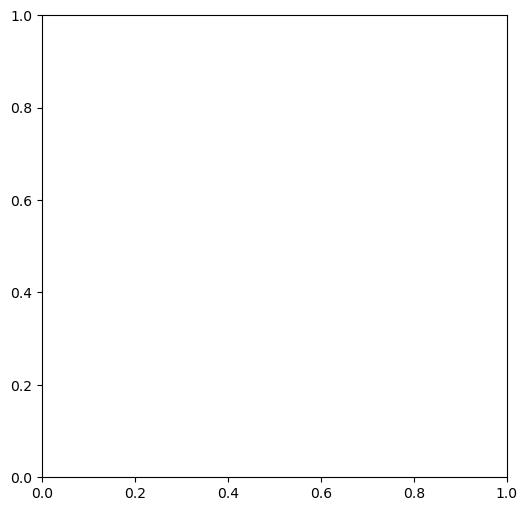

In [8]:
circle1 = plt.Circle((0, 0), 2.5, color='r')

fig1, ax1 = plt.subplots(figsize=(6, 6))
#ax1.set_xlim([-3, 3])
#ax1.set_ylim([-3, 3])

plt.quiver(X, Y, ux, uy )
ax1.streamplot(X, Y, ux, uy, density = 2)


ax1.add_patch(circle1)

plt.xlabel("y")
plt.ylabel("z")
plt.title("Mode ")

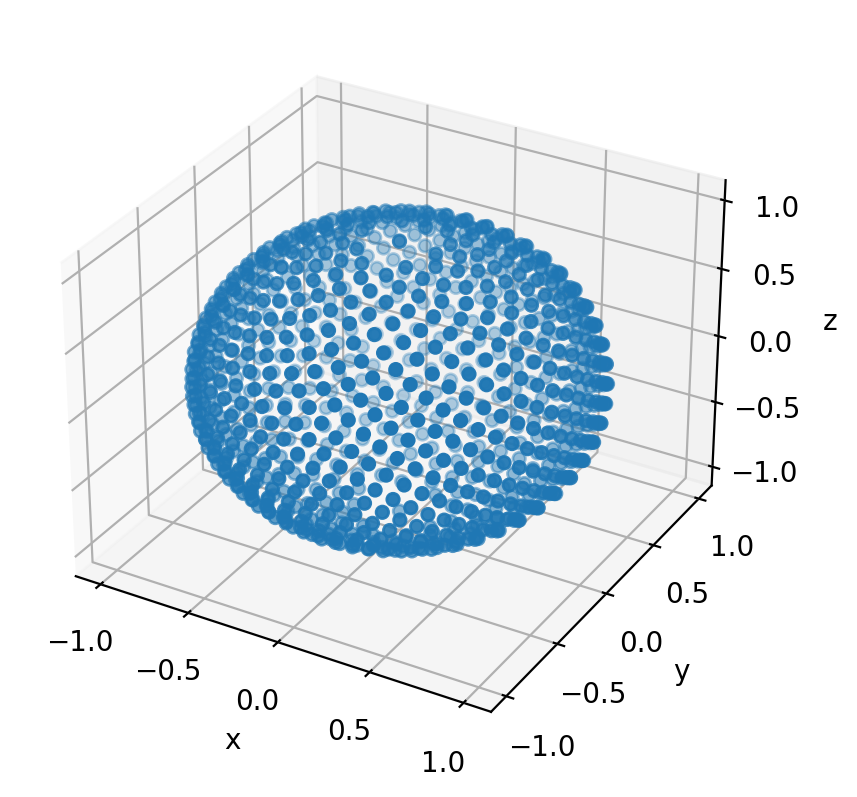

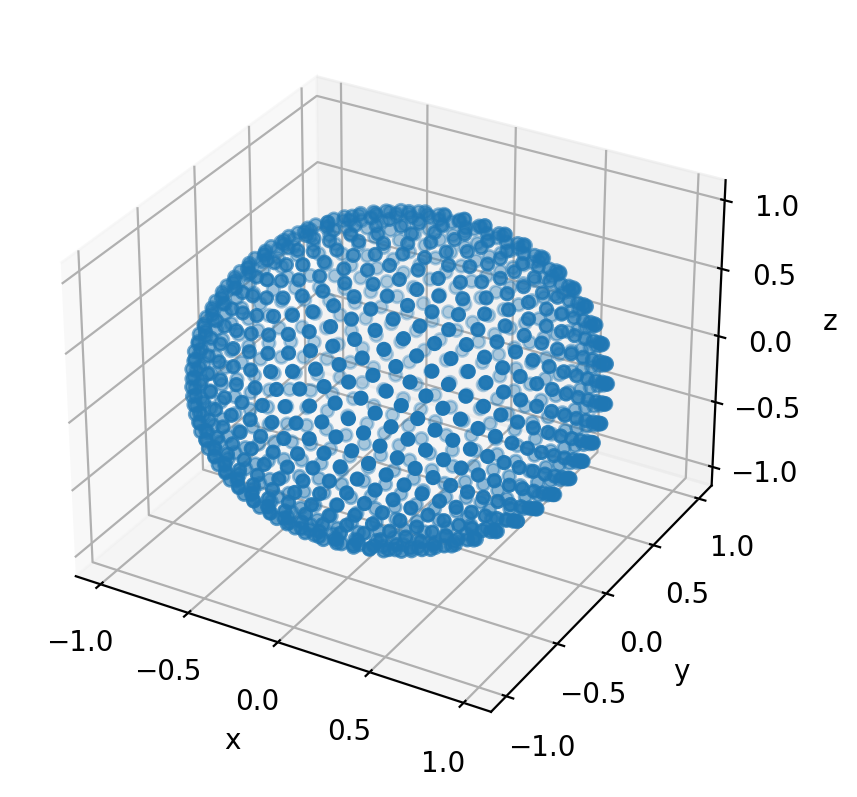

In [9]:
# Forces
def canonical_fibonacci_lattice(N, radius):
    """Calculate N points uniformly distributed on the surface of a sphere with given radius, using the canonical Fibonacci Lattice method.

    Args:
        N (int): Number of points
        radius (float): Radius of sphere.

    Returns:
        Tupple of three 1d-arrays and a float: Returns cartesian coordinates of the points distributed on the spherical surface, and the approximate area each point are given.
    """
    # Find spherical coordinates. 
    # Radius is contant, theta determined by golden ratio and phi is found using the Inverse Transform Method.
    offset = 0.5
    indices = np.arange(N)
    golden_ratio = (1 + np.sqrt(5)) / 2 
    theta = 2 * np.pi * indices / golden_ratio
    phi = np.arccos(1 - 2 * (indices + offset) / N)
    
    # Convert to cartesian
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    # The area of each patch is approximated by surface area divided by number of points
    area = 4 * np.pi * radius ** 2 / N
    return x, y, z, area    


def discretized_sphere(N, radius):
    """Calculate N points uniformly distributed on the surface of a sphere with given radius.
    The calculation is done using a modified version of the canonical Fibonacci Lattice.

    Args:
        N (int): Number of points
        radius (float): Radius of sphere.

    Returns:
        Tupple of three 1d-arrays and a float: Returns cartesian coordinates of the points distributed on the spherical surface, and the approximate area each point are given.
    """
    # Find best index offset based on N. 
    # From: http://extremelearning.com.au/how-to-evenly-distribute-points-on-a-sphere-more-effectively-than-the-canonical-fibonacci-lattice/
    # And inspired by: https://stackoverflow.com/questions/9600801/evenly-distributing-n-points-on-a-sphere 
    if N < 80:
        offset = 2.66
    elif N < 1e3:
        offset = 3.33
    elif N < 4e4:
        offset = 10
    else:  # N > 40_000
        offset = 25 
    # Place the first two points and top and bottom of the sphere (0, 0, radius) and (0, 0, -radius)
    x = np.empty(N)
    y = np.empty_like(x)
    z = np.empty_like(x)
    x[:2] = 0
    y[:2] = 0
    z[0] = radius
    z[1] = -radius
        
    # Find spherical coordinates. 
    # Radius is contant, theta determined by golden ratio and phi is found using the Inverse Transform Method.
    indices = np.arange(N-2)  # Two first points already placed, thus minus 2
    golden_ratio = (1 + np.sqrt(5)) / 2 
    theta = 2 * np.pi * indices / golden_ratio
    phi = np.arccos(1 - 2 * (indices + offset) / (N - 1 + 2 * offset))
    
    # Convert to cartesian
    x[2:] = radius * np.sin(phi) * np.cos(theta)
    y[2:] = radius * np.sin(phi) * np.sin(theta)
    z[2:] = radius * np.cos(phi)
    # The area of each patch is approximated by surface area divided by number of points
    area = 4 * np.pi * radius ** 2 / N
    return x, y, z, area
    

import matplotlib.pyplot as plt
N = 2
r = 3
a = 1
B = np.random.uniform(size=(N+1, N+1))
B_tilde = B / 2
C = B / 3
C_tilde = B / 4
theta = 0
#vals, diff = lpmn(N, N, np.cos(theta))
#print(diff)
#u_r, u_theta = field_polar(N, r, theta, a, B, B_tilde, C, C_tilde)
#print(u_r, u_theta)
x, y, z,_ = discretized_sphere(N=1000, radius=1)
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()
plt.close()

x_can, y_can, z_can, _ = canonical_fibonacci_lattice(N=1000, radius=1)
fig_1 = plt.figure(dpi=200)
ax_1 = fig_1.add_subplot(projection="3d")
ax_1.scatter(x_can, y_can, z_can)
ax_1.set_xlabel("x")
ax_1.set_ylabel("y")
ax_1.set_zlabel("z")
plt.show()
plt.close()


In [10]:
def Oseen(x, y, z, zeta_x, zeta_y, zeta_z, epsilon):
    """
    arbitary point: x,y,z 
    singular point: zeta_x, zeta_y, zeta_z,
    return the oseen matrix/tensor S which is 3x3 big
    The oseen tensor has NOT been integrated
    """
    S = np.ones((3,3))
    r1 = x - zeta_x  # distance between an arbitary point and the a singular point 
    r2 = y - zeta_y
    r3 = z - zeta_z
    
    r = np.sqrt(r1 ** 2 + r2 ** 2 + r3 ** 2)
    r_epsilon = np.sqrt(r ** 2 + epsilon ** 2)
        
    S[0, 0] = (r ** 2 + 2 * epsilon ** 2 + r1 ** 2) / r_epsilon ** 3
    S[1, 1] = (r ** 2 + 2 * epsilon ** 2 + r2 ** 2) / r_epsilon ** 3
    S[2, 2] = (r ** 2 + 2 * epsilon ** 2 + r3 ** 2) / r_epsilon ** 3
    S[0, 1] = S[1, 0] = r1 * r2 / r_epsilon ** 3
    S[0, 2] = S[2, 0] = r1 * r3 / r_epsilon ** 3
    S[1, 2] = S[2, 1] = r1 * r3 / r_epsilon ** 3
    
    return S

In [11]:
def A_matrix():
    """
    N: number of discretized points
    """
    A = np.ones((3*N, 3*N))
    
    return A

In [12]:
N = 4
A = np.ones((3*N ,3*N))
B = np.ones((3*N))
print(np.shape( B))
A[0:3, 0:3] = 10 
A[0:3 , 3 :2*3 ] = 12
A[0:3 , 2*3 :3*3 ] = 33
A[0:3 , 3*3 :4*3 ] = 4

A[3:2*3,  0:3] = 58
A[2*3:3*3,  0:3] = 0
A[3*3:4*3, 0:3] = 66

A[3*3:4*3, 3*3:4*3] = 100

print(A)
print(np.shape(A @ B))
A @ B

(12,)
[[ 10.  10.  10.  12.  12.  12.  33.  33.  33.   4.   4.   4.]
 [ 10.  10.  10.  12.  12.  12.  33.  33.  33.   4.   4.   4.]
 [ 10.  10.  10.  12.  12.  12.  33.  33.  33.   4.   4.   4.]
 [ 58.  58.  58.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ 58.  58.  58.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ 58.  58.  58.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ 66.  66.  66.   1.   1.   1.   1.   1.   1. 100. 100. 100.]
 [ 66.  66.  66.   1.   1.   1.   1.   1.   1. 100. 100. 100.]
 [ 66.  66.  66.   1.   1.   1.   1.   1.   1. 100. 100. 100.]]
(12,)


array([177., 177., 177., 183., 183., 183.,   9.,   9.,   9., 504., 504.,
       504.])

In [19]:
def oseen_tensor(x, y, z, epsilon, dA, viscosity):
    """Find Oseen tensor for all multiple points.

    Args:
        x (1d array of floats): x-coordinate of all points
        y (1d array of floats): y-coordinate of all points
        z (1d array of floats): z-coordinate of all points
        epsilon (float): The regularization offset
        dA (float): Area of each patch, assumed the same for all points
        viscosity (float): Viscosity of the fluid.

    Returns:
        _type_: _description_
    """
    N = np.shape(x)[0]
    dx = x[:, None] - x[None, :]
    dy = y[:, None] - y[None, :]
    dz = z[:, None] - z[None, :]
    r = np.sqrt(dx**2 + dy**2 + dz**2)  # Symmetrical, could save memory?
    
    # Expand r to match S - OPTIMIZEABLE
    r_expanded = np.repeat(r, 3, axis=0)
    r_expanded = np.repeat(r_expanded, 3, axis=1)
    r_epsilon = np.sqrt(r_expanded**2 + epsilon**2)
    
    S_diag = np.zeros((3*N, 3*N))  # 3 variables, so 3N in each direction
    S_diag[:N, :N] = dx
    S_diag[N:2*N, N:2*N] = dy
    S_diag[2*N:3*N, 2*N:3*N] = dz
    
    S_off_diag = np.zeros_like(S_diag)
    S_off_diag[0:N, N:2*N] = dx * dy  # Element wise multiplication
    S_off_diag[0:N, 2*N:3*N] = dx * dz
    S_off_diag[N:2*N, 2*N:3*N] = dy * dz
    
    S = ((r_expanded**2 + 2 * epsilon**2) * S_diag
         + S_off_diag
         + S_off_diag.T
    ) / r_epsilon ** 3
    
    A = S * dA / (4 * np.pi * viscosity)
    return A
    

In [23]:
x, y, z, da = discretized_sphere(50 , 1)

ux, uy, uz = velocity(x, y,z, 1)

U = np.array((ux, uy, uz)).flatten()
print(np.shape(x))

(50,)


In [21]:
A = oseen_tensor(x, y, z, 0.01, da, 1)
np.shape(A)


(150, 150)

In [16]:
F =np.linalg.solve(A, U)

In [ ]:
cdcdaf